## 1. Import libraries

In [23]:
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
from IPython.display import Image

sns.set()
%matplotlib inline

## 2. Read in all data

In [2]:
fert = pd.read_csv('data_input/gapminder_total_fertility.csv', index_col=0)
life = pd.read_excel('data_input/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('data_input/gapminder_population.xlsx', index_col=0)

## 3. Check shape of datasets

In [3]:
print(fert.shape)

(260, 216)


In [4]:
print(life.shape)

(260, 217)


In [5]:
print(pop.shape)

(275, 81)


## 4. compare datatype of columns

In [6]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [7]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [8]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

### 4.1 convert fertility columns from object to integer

In [9]:
ncol = [int(x) for x in fert.columns]
fert.set_axis(axis=1, labels=ncol, inplace=True)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

## 5. stack datasets fert, life, pop

- add fert,life and pop to a dictionary d
- add d to a dataframe df
- print to check outcome
- stack combined dataframe to get an index for fert, life and pop

In [10]:
sfert = fert.stack()
slife = life.stack()
spop = pop.stack()

In [11]:
d = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df = pd.DataFrame(data=d)
print(df)

                  fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN
            1803        7.0    28.18         NaN
            1804        7.0    28.17         NaN
...                     ...      ...         ...
Åland       2006        NaN    80.10     26923.0
            2007        NaN      NaN     26923.0
            2008        NaN      NaN     26923.0
            2009        NaN      NaN     26923.0
            2010        NaN      NaN     26923.0

[47688 rows x 3 columns]


In [12]:
df2 = df.stack()
print(df2)

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
             1801  fertility           7.00
                   lifeexp            28.20
                                    ...    
Åland        2006  population      26923.00
             2007  population      26923.00
             2008  population      26923.00
             2009  population      26923.00
             2010  population      26923.00
Length: 107445, dtype: float64


### 5.1 unstack country and fert, life and pop from the dataset

- years remain as rows

In [13]:
df3 = df2.unstack((0,2))
print(df3)

     Afghanistan                     Akrotiri and Dhekelia   Albania          \
       fertility lifeexp  population            population fertility lifeexp   
1800        7.00   28.21   3280000.0                   NaN      4.60    35.4   
1801        7.00   28.20         NaN                   NaN      4.60    35.4   
1802        7.00   28.19         NaN                   NaN      4.60    35.4   
1803        7.00   28.18         NaN                   NaN      4.60    35.4   
1804        7.00   28.17         NaN                   NaN      4.60    35.4   
...          ...     ...         ...                   ...       ...     ...   
2012        5.14   54.40  29726803.0                   NaN      1.76    77.5   
2013        4.90   54.80  30682500.0                   NaN      1.77    77.7   
2014        4.68   54.90  31627506.0                   NaN      1.78    77.9   
2015        4.47   53.80  32526562.0                   NaN      1.78    78.0   
2016         NaN   52.72         NaN    

## 6. Plotting datasets
### 6.1 line chart

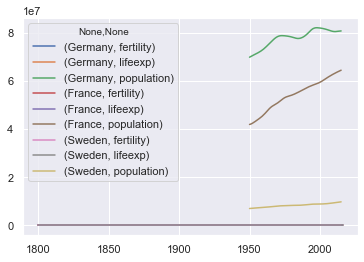

In [14]:
df3[['Germany', 'France', 'Sweden']].plot()

### 6.2 Scatter plots

- all years on one chart

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


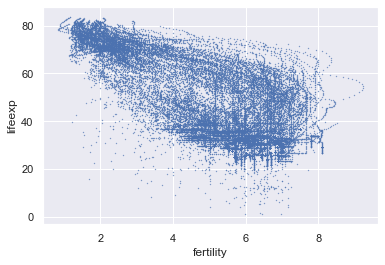

In [15]:
df.plot.scatter('fertility', 'lifeexp', s=0.1)

- use original df dataset and reformat to years as colums first, to be able to plot single years from now on

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


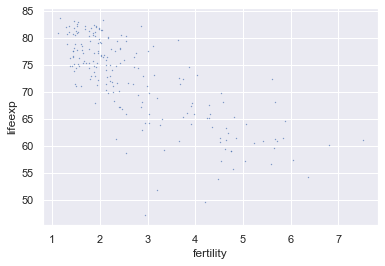

In [16]:
df4 = df.stack().unstack(1).unstack(1)
df4 = df4[2015]
df4.plot.scatter('fertility', 'lifeexp', s=0.1)

- recolour plot

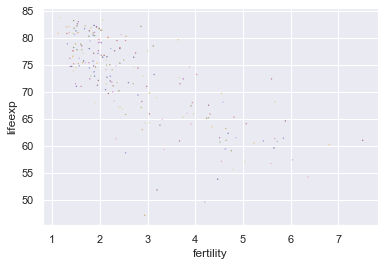

In [17]:
cmap = plt.get_cmap('tab20b', lut = len(df4)).colors
df4.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

- change size of marker with s=df['population']

(1, 10, 10, 90)

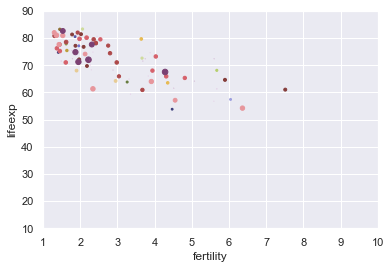

In [18]:
cmap = plt.get_cmap('tab20b', lut = len(df4)).colors
df4.plot.scatter('fertility', 'lifeexp', s=df['population'] / 1000000, c=cmap)
plt.axis((1,10,10,90))

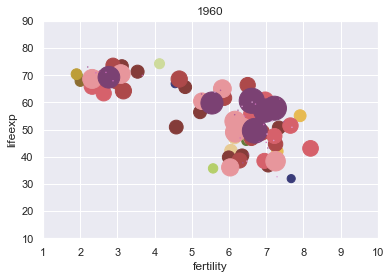

In [34]:
df4 = df.stack().unstack(1).unstack(1)
df4 = df4[1960]
cmap = plt.get_cmap('tab20b', lut = len(df4)).colors
df4.plot.scatter('fertility', 'lifeexp', s=df['population'] / 50000, c=cmap)
plt.axis((1,10,10,90))
plt.title('1960')
plt.savefig('lifeexp_1960.png', bbox_inches='tight')

## 7. loop through years 1960-2015 and save png of each year in folder

In [28]:
gm = df.stack().unstack(1).unstack(1)
for i in range (1960, 2016):
    gm1 = gm[i]
    cmap = plt.get_cmap('tab20b', lut = len(gm1)).colors
    gm1.plot.scatter('fertility', 'lifeexp', s=df['population'] / 50000, c=cmap)
    plt.axis((1,10,10,90))
    plt.title(f'{i}')
    plt.savefig(f'scatter_images/lifeexp_{i}.png', bbox_inches='tight')
    plt.clf()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## 8. Combine to GIF

- loop through all pictures in folder and save to gif

In [29]:
images = []
for i in range(1960, 2016):
    filename = 'scatter_images/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output_gapminder.gif', images, fps=10)

Image(url='output_gapminder.gif')